In [1]:
import pandas as pd
import numpy as np 

# Loading the data 
df = pd.read_csv('breed_rank.csv')  # Fixed: .csv not .cvs
print("Dataset shape:", df.shape)
print("First few rows:")
print(df.head())

# Checking for missing values 
rank_columns = ['2013 Rank', '2014 Rank', '2015 Rank', '2016 Rank', 
                '2017 Rank', '2018 Rank', '2019 Rank', '2020 Rank']
print("Missing values in ranking columns:")
for col in rank_columns:
    missing_count = df[col].isnull().sum()
    print(f"{col}: {missing_count} missing")

# Filter to breeds with sufficient data 
df_clean = df.copy()
df_clean['years_with_data'] = df_clean[rank_columns].count(axis=1)  

# Keep breeds with at least 4 years of data 
df_filtered = df_clean[df_clean['years_with_data'] >= 4].copy()

# Calculate trend metrics 
df_filtered['net_change_2013_2020'] = df_filtered['2013 Rank'] - df_filtered['2020 Rank']
df_filtered['avg_rank'] = df_filtered[rank_columns].mean(axis=1, skipna=True)

# Categorize trends
def categorize_trend(net_change):
    if pd.isna(net_change):
        return "Insufficient Data"
    elif net_change >= 5:  # Improved by 5+ ranks
        return "Rising"
    elif net_change <= -5:  # Declined by 5+ ranks 
        return "Falling"
    else:
        return "Stable"

df_filtered['trend_category'] = df_filtered['net_change_2013_2020'].apply(categorize_trend)

# Create focused dataset
top_50_2020 = df_filtered[df_filtered['2020 Rank'] <= 50].copy()

# Save for later analysis 
df_filtered.to_csv('akc_breeds_filtered.csv', index=False)
top_50_2020.to_csv('akc_top50_breeds.csv', index=False)

print("Data filtering complete!")

Dataset shape: (195, 11)
First few rows:
                   Breed  2013 Rank  2014 Rank  2015 Rank  2016 Rank  \
0  Retrievers (Labrador)        1.0        1.0        1.0        1.0   
1        French Bulldogs       11.0        9.0        6.0        6.0   
2   German Shepherd Dogs        2.0        2.0        2.0        2.0   
3    Retrievers (Golden)        3.0        3.0        3.0        3.0   
4               Bulldogs        5.0        4.0        4.0        4.0   

   2017 Rank  2018 Rank  2019 Rank  2020 Rank  \
0        1.0        1.0        1.0          1   
1        4.0        4.0        4.0          2   
2        2.0        2.0        2.0          3   
3        3.0        3.0        3.0          4   
4        5.0        5.0        5.0          5   

                                               links  \
0  https://www.akc.org/dog-breeds/labrador-retrie...   
1     https://www.akc.org/dog-breeds/french-bulldog/   
2  https://www.akc.org/dog-breeds/german-shepherd...   
3   htt

In [7]:
print(df_filtered.head(1))

                   Breed  2013 Rank  2014 Rank  2015 Rank  2016 Rank  \
0  Retrievers (Labrador)        1.0        1.0        1.0        1.0   

   2017 Rank  2018 Rank  2019 Rank  2020 Rank  \
0        1.0        1.0        1.0          1   

                                               links  \
0  https://www.akc.org/dog-breeds/labrador-retrie...   

                                               Image  years_with_data  \
0  https://www.akc.org/wp-content/uploads/2017/11...                8   

   net_change_2013_2020  avg_rank trend_category  
0                   0.0       1.0         Stable  


Creating Chart 1: Top 10 Breeds Popularity Over Time


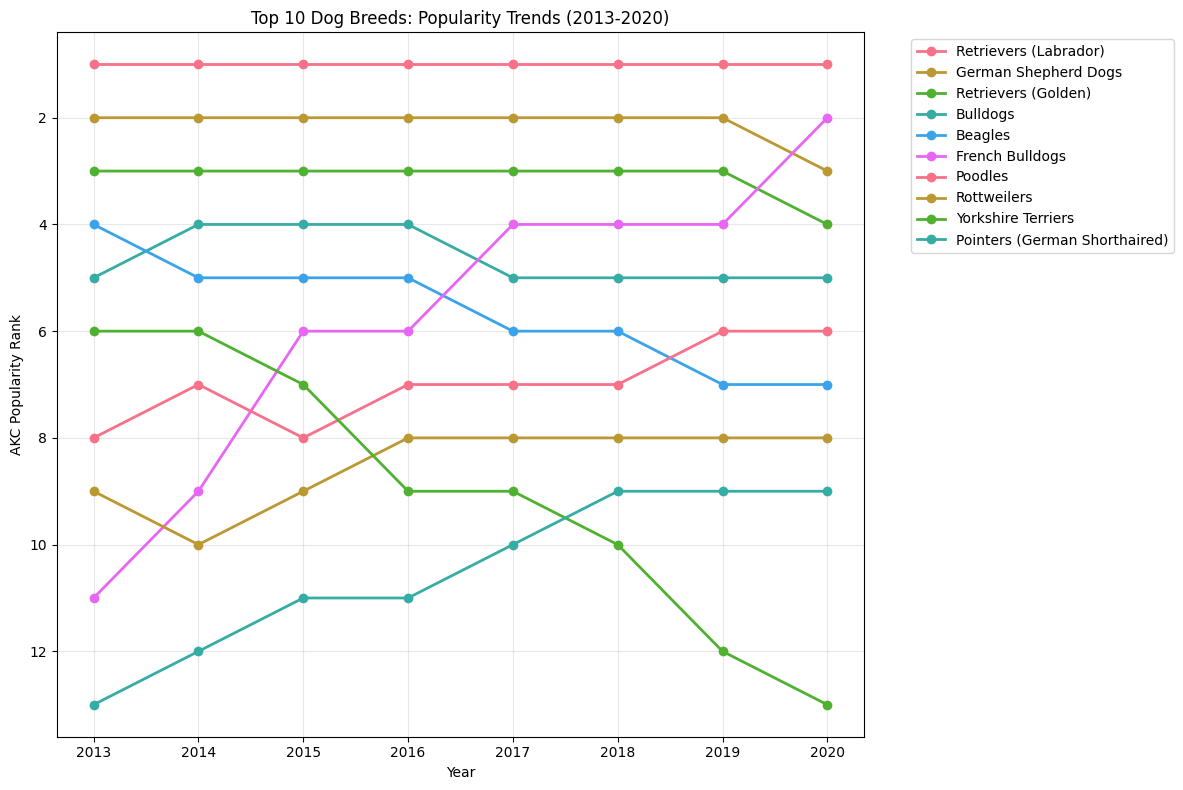

Creating Chart 2: Biggest Rank Changes


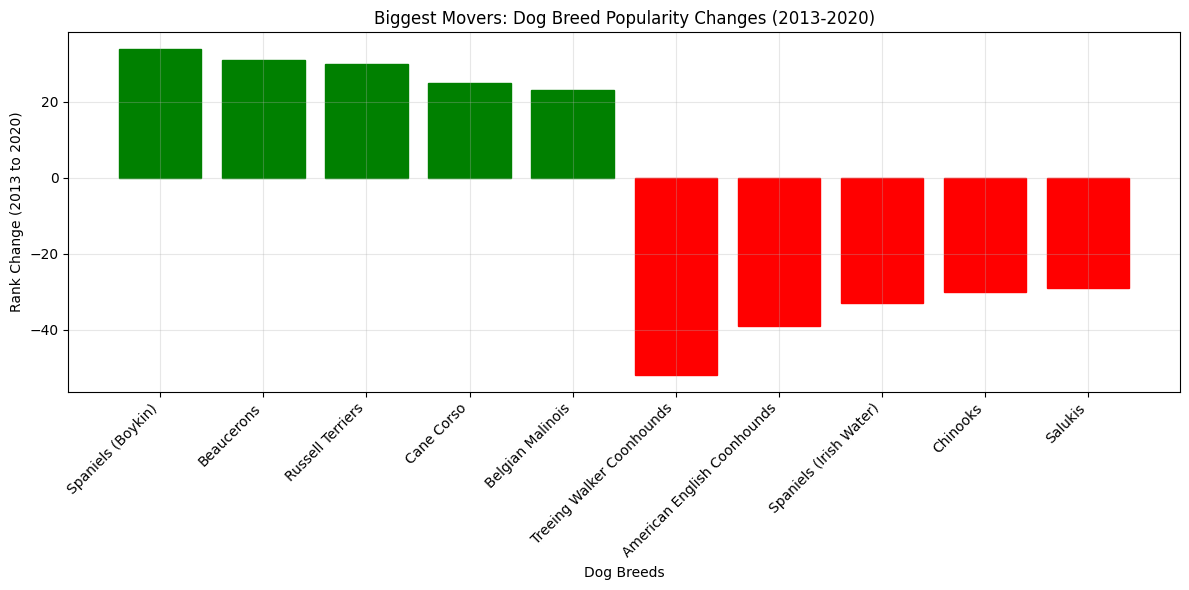

Creating Chart 3: Trend Category Distribution


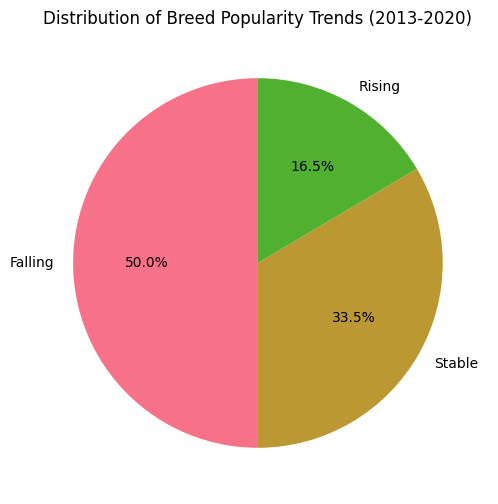

All charts created successfully!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# load filtered data 
df_filtered = pd.read_csv('akc_breeds_filtered.csv')

# set up plotting 
plt.style.use('default')
sns.set_palette("husl")

#chart #1: Line Chart of Top 10 Most Popular Breeds Over Time
print("Creating Chart 1: Top 10 Breeds Popularity Over Time")

# get top 10 breeds by average rank 
top_10 = df_filtered.nsmallest(10, 'avg_rank')
rank_columns = ['2013 Rank', '2014 Rank', '2015 Rank', '2016 Rank', 
                '2017 Rank', '2018 Rank', '2019 Rank', '2020 Rank']

plt.figure(figsize=(12, 8))
for idx, row in top_10.iterrows():
    years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
    ranks = [row[col] for col in rank_columns]
    plt.plot(years, ranks, marker='o', linewidth=2, label=row['Breed'])

plt.gca().invert_yaxis()  # Lower rank numbers (more popular) at top
plt.xlabel('Year')
plt.ylabel('AKC Popularity Rank')
plt.title('Top 10 Dog Breeds: Popularity Trends (2013-2020)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Chart 2: Bar Chart of Biggest Rank Changes 
print("Creating Chart 2: Biggest Rank Changes")

#Get breeds with complete data for 2013-2020 comparison
complete_data = df_filtered[df_filtered['net_change_2013_2020'].notna()]

# get top 5 risers and top 5 fallers
top_risers = complete_data.nlargest(5, 'net_change_2013_2020')
top_fallers = complete_data.nsmallest(5, 'net_change_2013_2020')

# combine for plotting
changes_data = pd.concat([top_risers, top_fallers])

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(changes_data)), changes_data['net_change_2013_2020'])

# color bars: green for positive (rising), red for negative (falling)
for i, bar in enumerate(bars):
    if changes_data.iloc[i]['net_change_2013_2020'] > 0:
        bar.set_color('green')
    else:
        bar.set_color('red')

plt.xlabel('Dog Breeds')
plt.ylabel('Rank Change (2013 to 2020)')
plt.title('Biggest Movers: Dog Breed Popularity Changes (2013-2020)')
plt.xticks(range(len(changes_data)), changes_data['Breed'], rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# CHART 3: Overall Trend Distribution
print("Creating Chart 3: Trend Category Distribution")

trend_counts = df_filtered['trend_category'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(trend_counts.values, labels=trend_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Breed Popularity Trends (2013-2020)')
plt.show()

print("All charts created successfully!")

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load filtered rankings from Module 1
df_filtered = pd.read_csv('akc_breeds_filtered.csv')

# Load breed trait dataset – structure should contain columns like:
# Breed, Coat Length, Openness to Strangers, Energy Level, Barking Level, Shedding Level, Trainability, ...
traits = pd.read_csv('breed_traits.csv')

# Merge on breed name
df_cluster = pd.merge(df_filtered, traits, on='Breed', how='inner')

print("Merged dataset shape:", df_cluster.shape)
print(df_cluster.head(5))

# Select only numeric trait columns
trait_cols = ['Coat Length', 'Openness to Strangers', 'Energy Level',
              'Shedding Level', 'Trainability', 'Barking Level',
              'Affection With Family', 'Adaptability Level']

X = df_cluster[trait_cols]

# Standardize features for clustering
scaler = StandardScaler()
X_numeric = X.select_dtypes(include=['int64','float64'])
X_scaled = scaler.fit_transform(X_numeric)

# X_scaled = scaler.fit_transform(X)

Merged dataset shape: (44, 31)
         Breed  2013 Rank  2014 Rank  2015 Rank  2016 Rank  2017 Rank  \
0     Bulldogs        5.0        4.0        4.0        4.0        5.0   
1      Poodles        8.0        7.0        8.0        7.0        7.0   
2      Beagles        4.0        5.0        5.0        5.0        6.0   
3  Rottweilers        9.0       10.0        9.0        8.0        8.0   
4   Dachshunds       10.0       11.0       13.0       13.0       13.0   

   2018 Rank  2019 Rank  2020 Rank  \
0        5.0        5.0          5   
1        7.0        6.0          6   
2        6.0        7.0          7   
3        8.0        8.0          8   
4       12.0       11.0         10   

                                             links  ... Coat Type  \
0          https://www.akc.org/dog-breeds/bulldog/  ...    Smooth   
1  https://www.akc.org/dog-breeds/poodle-standard/  ...     Curly   
2           https://www.akc.org/dog-breeds/beagle/  ...    Smooth   
3       https://www.akc.o

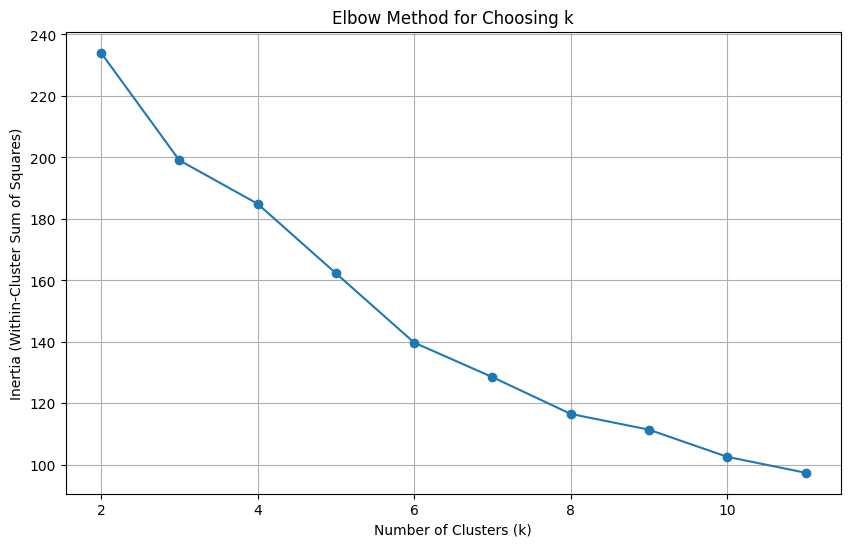

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K = range(2, 12)  # test 2–11 clusters

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Choosing k')
plt.grid(True)
plt.show()

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

In [5]:
from sklearn.metrics import silhouette_score

labels = df_cluster['cluster']

score = silhouette_score(X_scaled, labels)
print(f'Silhouette score for k={k}: {score:.3f}')

Silhouette score for k=5: 0.148


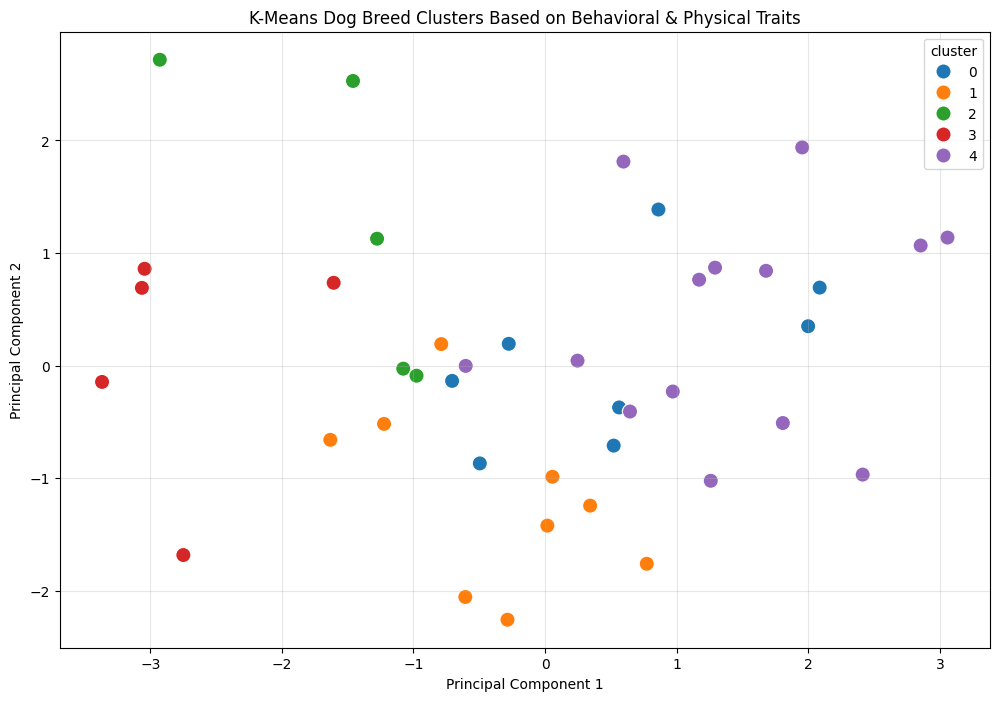

In [25]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

df_cluster['PC1'] = components[:, 0]
df_cluster['PC2'] = components[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='cluster',
    palette='tab10',
    data=df_cluster,
    s=120
)
plt.title('K-Means Dog Breed Clusters Based on Behavioral & Physical Traits')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.show()

In [22]:
# Display the data types of all columns in the df_cluster DataFrame
print(df_cluster.dtypes)

Breed                          object
2013 Rank                     float64
2014 Rank                     float64
2015 Rank                     float64
2016 Rank                     float64
2017 Rank                     float64
2018 Rank                     float64
2019 Rank                     float64
2020 Rank                       int64
links                          object
Image                          object
years_with_data                 int64
net_change_2013_2020          float64
avg_rank                      float64
trend_category                 object
Affection With Family           int64
Good With Young Children        int64
Good With Other Dogs            int64
Shedding Level                  int64
Coat Grooming Frequency         int64
Drooling Level                  int64
Coat Type                      object
Coat Length                    object
Openness to Strangers           int64
Playfulness Level               int64
Watchdog/Protective Nature      int64
Adaptability

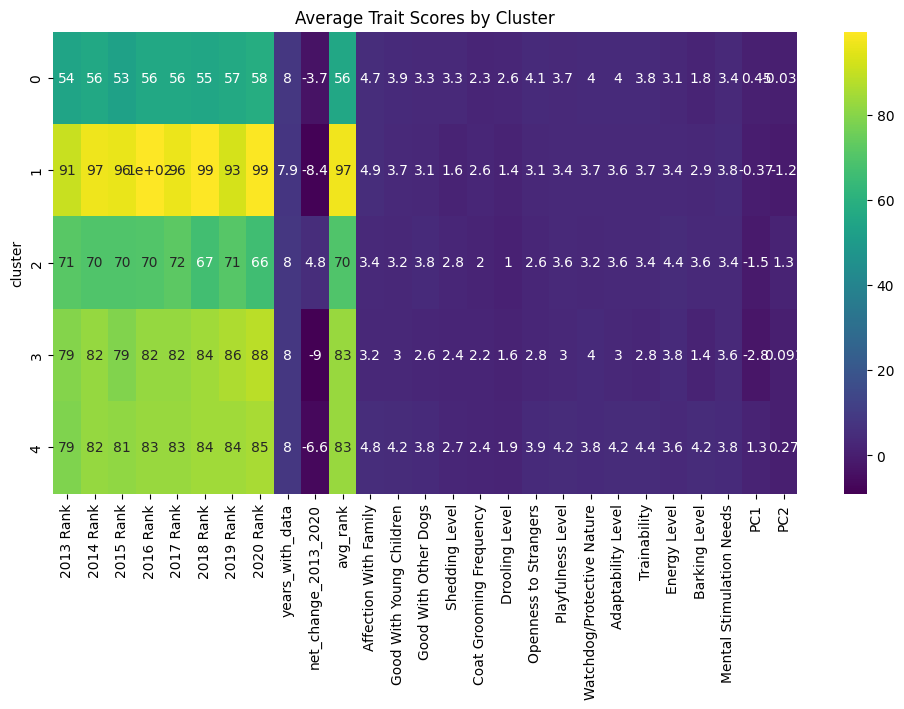

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


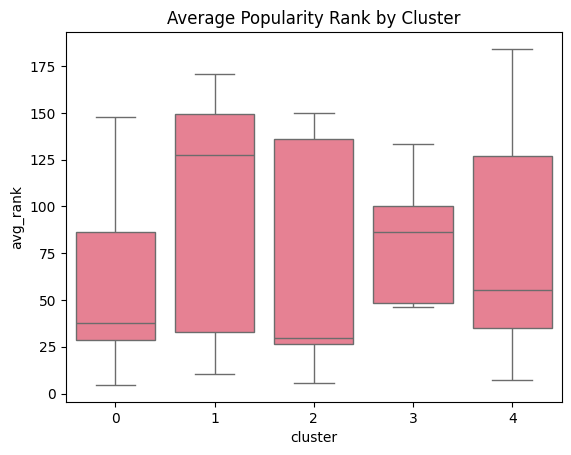

/root/venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/root/venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/root/venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


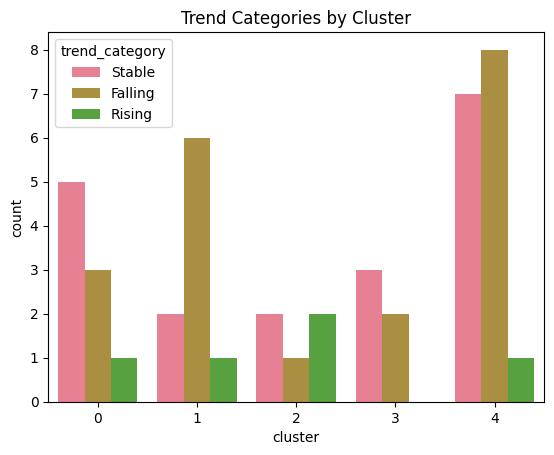

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

trait_cols = df_cluster.select_dtypes(include=['int64', 'float64']).columns
cluster_means = df_cluster.groupby('cluster')[trait_cols].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, annot=True, cmap='viridis')
plt.title("Average Trait Scores by Cluster")
plt.show()


sns.boxplot(data=df_cluster, x='cluster', y='avg_rank')
plt.title("Average Popularity Rank by Cluster")
plt.show()


sns.countplot(data=df_cluster, x='cluster', hue='trend_category')
plt.title("Trend Categories by Cluster")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=eb187a2d-bced-402d-86c5-d92317e22756' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>